# NLP: Sentiment Analysis on Healthcare Reviews

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
%matplotlib inline

### Import Files 

In [2]:
df = pd.read_csv("C:\\Users\\jithe\\Downloads\\Projects\\healthcare_reviews.csv")

In [3]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


#### Pandas Profiling

In [4]:
from ydata_profiling import ProfileReport
pr_df = ProfileReport(df)

In [5]:
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [8]:
df_clean = df.dropna()

In [9]:
df_clean.duplicated().sum()

855

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 21.1+ KB


In [11]:
df_clean.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 21.1+ KB


### Data Preprocessing

#### Standardzation of data

Removing Special Characters and numbers

In [13]:
from sklearn.feature_extraction.text import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [14]:
df_clean['Review_Text'] = df_clean['Review_Text'].apply(clean)

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\142550118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Review_Text'] = df_clean['Review_Text'].apply(clean)


Transforming into lowercase

In [15]:
df_clean['Review_Text'] = df_clean['Review_Text'].str.lower()

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\60071468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Review_Text'] = df_clean['Review_Text'].str.lower()


In [16]:
df_clean

,Review_Text,Rating
0,i have mixed feelings about my experience,4
1,the staff was caring and attentive i couldn t ...,5
2,i have mixed feelings about my experience,5
3,i have mixed feelings about my experience,5
4,the healthcare provider was excellent i had a ...,3
...,...,...
995,my experience was terrible i would not recomme...,5
996,the service was disappointing i won t be comin...,4
997,the service was okay but nothing exceptional,3
998,i have mixed feelings about my experience,5


#### Tokenization

In [17]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#### Stopwords removal

#### POS tagging

In [18]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

In [19]:
df_clean['Review_Text'] = df_clean['Review_Text'].apply(token_stop_pos)

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\4273385917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Review_Text'] = df_clean['Review_Text'].apply(token_stop_pos)


In [20]:
df_clean

,Review_Text,Rating
0,"[(mixed, v), (feelings, n), (experience, n)]",4
1,"[(staff, n), (caring, v), (attentive, a), (hap...",5
2,"[(mixed, v), (feelings, n), (experience, n)]",5
3,"[(mixed, v), (feelings, n), (experience, n)]",5
4,"[(healthcare, n), (provider, n), (excellent, a...",3
...,...,...
995,"[(experience, n), (terrible, a), (would, None)...",5
996,"[(service, n), (disappointing, v), (coming, v)...",4
997,"[(service, n), (okay, a), (nothing, n), (excep...",3
998,"[(mixed, v), (feelings, n), (experience, n)]",5


#### Obtaining the stem words

In [21]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemmatized_words = []
    for item in pos_data:
        if isinstance(item, tuple) and len(item) == 2:
            word, pos = item
            if pos is None:
                # Provide a default part-of-speech tag (e.g., noun)
                pos = 'n'
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        else:
            lemma = item  # Use the word itself if it's not a tuple with (word, pos)
        lemmatized_words.append(lemma)
    
    # Join the lemmatized words into a single string
    lemma_rew = " ".join(lemmatized_words)
    return lemma_rew


In [22]:
df_clean['Review_Text'] = df_clean['Review_Text'].apply(lemmatize)

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\2839271111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Review_Text'] = df_clean['Review_Text'].apply(lemmatize)


In [23]:
df_clean['Review_Text'][0]

'mix feeling experience'

Text Blob is a Python library for Natural Language Processing. Using Text Blob for sentiment analysis is quite simple. It takes text as an input and can return polarity and subjectivity as outputs.

Polarity determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

Subjectivity determines whether a text input is factual information or a personal opinion. Its value lies between [0,1] where a value closer to 0 denotes a piece of factual information and a value closer to 1 denotes a personal opinion.

### EDA
#### Sentiment Analysis

In [24]:
from textblob import TextBlob

In [25]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis function to the 'ReviewText' column
df_clean[['Polarity', 'Subjectivity']] = df_clean['Review_Text'].apply(analyze_sentiment).apply(pd.Series)

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\2106454233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Polarity', 'Subjectivity']] = df_clean['Review_Text'].apply(analyze_sentiment).apply(pd.Series)
C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\2106454233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['Polarity', 'Subjectivity']] = df_clean['Review_Text'].apply(analyze_sentiment).apply(pd.Series)


In [26]:
pd.DataFrame(df_clean)

,Review_Text,Rating,Polarity,Subjectivity
0,mix feeling experience,4,0.000000,0.000
1,staff care attentive happy,5,0.600000,0.950
2,mix feeling experience,5,0.000000,0.000
3,mix feeling experience,5,0.000000,0.000
4,healthcare provider excellent great experience,3,0.900000,0.875
...,...,...,...,...
995,experience terrible would recommend provider,5,-1.000000,1.000
996,service disappoint come back,4,0.000000,0.000
997,service okay nothing exceptional,3,0.583333,0.750
998,mix feeling experience,5,0.000000,0.000


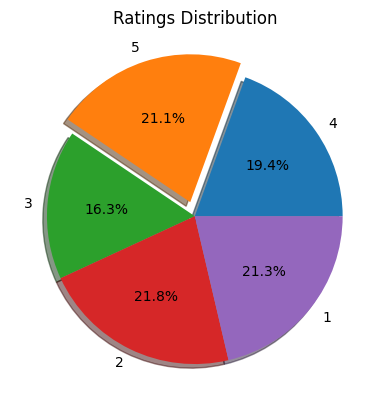

In [27]:
ratings = df['Rating'].unique()
rating_counts = df_clean['Rating'].value_counts().sort_index()
explode = (0, 0.1, 0, 0, 0)
plt.pie(rating_counts, labels=ratings, autopct="%1.1f%%", shadow = True, explode=explode)
plt.title("Ratings Distribution")
plt.show()

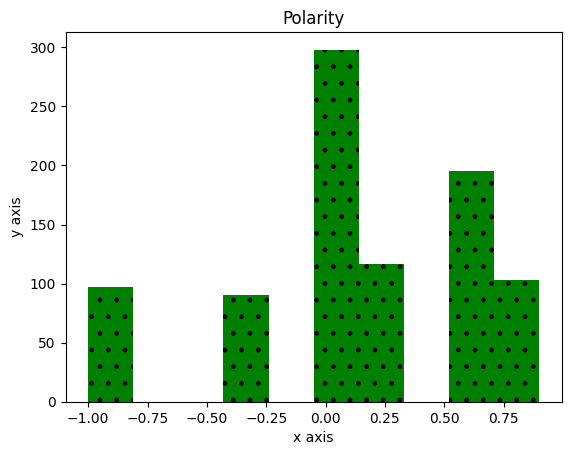

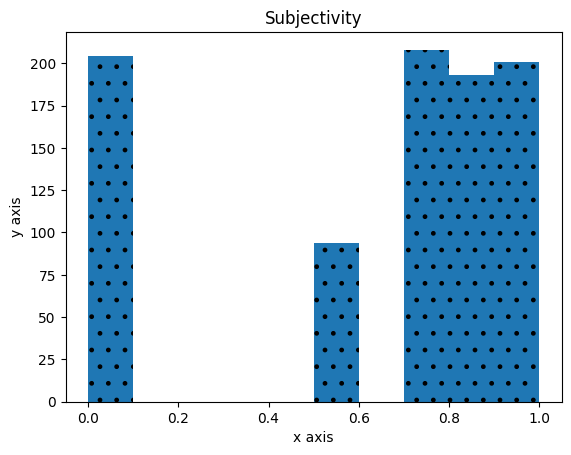

In [28]:
plt.hist((df_clean['Polarity']), color = 'green', hatch='.')
plt.title("Polarity")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

plt.hist(df_clean['Subjectivity'], hatch='.')
plt.title("Subjectivity")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

### Feature Engineering

In [30]:
# Function to create a new feature

def create_sentiment(rating):
    if rating == 1 or rating == 2:
        return -1
    elif rating == 4 or rating == 5:
        return 1
    else :
        return 0

In [31]:
df_clean['Sentiment'] = df_clean['Rating'].apply(create_sentiment)

C:\Users\jithe\AppData\Local\Temp\ipykernel_14864\1315341530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sentiment'] = df_clean['Rating'].apply(create_sentiment)


In [32]:
df_clean

,Review_Text,Rating,Polarity,Subjectivity,Sentiment
0,mix feeling experience,4,0.000000,0.000,1
1,staff care attentive happy,5,0.600000,0.950,1
2,mix feeling experience,5,0.000000,0.000,1
3,mix feeling experience,5,0.000000,0.000,1
4,healthcare provider excellent great experience,3,0.900000,0.875,0
...,...,...,...,...,...
995,experience terrible would recommend provider,5,-1.000000,1.000,1
996,service disappoint come back,4,0.000000,0.000,1
997,service okay nothing exceptional,3,0.583333,0.750,0
998,mix feeling experience,5,0.000000,0.000,1


#### TF-IDF Vectorization

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

# Transform the DataFrame into a TF-IDF matrix
x2 = tfidf.fit_transform(df_clean['Review_Text'])

In [34]:
pd.DataFrame(x2)

,0
0,"(0, 10)\t0.3368901515476508\n (0, 11)\t0.66..."
1,"(0, 14)\t0.5\n (0, 0)\t0.5\n (0, 5)\t0.5\n..."
2,"(0, 10)\t0.3368901515476508\n (0, 11)\t0.66..."
3,"(0, 10)\t0.3368901515476508\n (0, 11)\t0.66..."
4,"(0, 13)\t0.5453001073729656\n (0, 8)\t0.545..."
...,...
895,"(0, 24)\t0.5204043550228348\n (0, 30)\t0.52..."
896,"(0, 3)\t0.5400148166577031\n (0, 6)\t0.5400..."
897,"(0, 9)\t0.5430796664820691\n (0, 19)\t0.543..."
898,"(0, 10)\t0.3368901515476508\n (0, 11)\t0.66..."


## Machine Learning

In [35]:
from sklearn.model_selection import train_test_split
x = df_clean.iloc[:, 3].values
y = df_clean['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state=0)

In [36]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [37]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

#x_train_dense = x_train.toarray()
#x_test_dense = x_test.toarray()

# Create and fit the logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = lr.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred_lr,y_test)

0.3688888888888889

In [41]:
confusion_matrix(y_pred_lr,y_test)

array([[  0,   0,   0],
       [  0,   0,   0],
       [107,  35,  83]], dtype=int64)

#### SVM

In [62]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='sigmoid', random_state=0)  
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [63]:
y_pred_SVM= classifier.predict(x_test)

In [64]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_SVM)

In [65]:
cm

array([[37,  0, 70],
       [ 9,  0, 26],
       [31,  0, 52]], dtype=int64)

In [66]:
accuracy_score(y_pred_SVM,y_test)

0.39555555555555555